# Linear Regression with One Variable

This notebook's tutorial contains:

1. Generating Linear Data
2. Using Ordinary Least Squares Method to estimate Parameters
3. Using Normal Equation to estimate parameters
4. Building regression model and training it with gradient descent
5. Comparing results for estimated parameters from different methods


Consider a line: y = 3x + 2. Let's draw this between x = -100 and x = 100

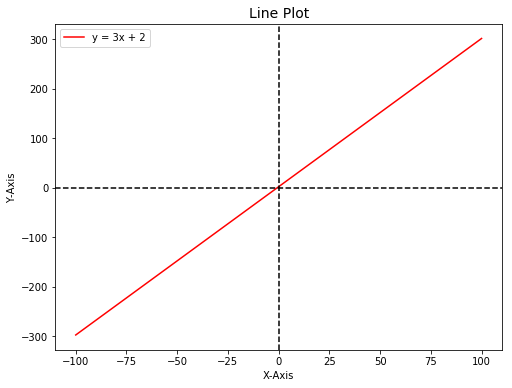

In [0]:
import matplotlib.pyplot as plt                                                 # Import pyplot library from matplotlib
import numpy as np                                                              # Import numpy library

# Get 1000 equally distant values between -100 and +100
x=np.linspace(-100,100,1000)                    

# The equation of line:
y=3*x+2

# We need one long vector for each x and y
x=np.reshape(x,(-1,1))                                  # Reshape arrays to have 1 channel in empty dimension
y=np.reshape(y,(-1,1))

# Create a figure to plot
plt.figure(figsize=(8,6))

# Set title of the figure
plt.title('Line Plot',fontsize=14)

# Plot x and y points as a line
plt.plot(x,y,c='red',label='y = 3x + 2')

# Draw X and Y Axis
plt.axhline(y=0,c='black',linestyle='--')
plt.axvline(x=0,c='black',linestyle='--')

# Set X and Y axis labels
plt.xlabel('X-Axis')
plt.ylabel('Y-Axis')

# Add legend on upper left side
plt.legend(loc='upper left')

plt.show()

This line is actually a set of points that lie on a straight line. We want to build a regression model that given a set of points (x,y), can accurately map x to y. In other words, it can estimate the parameters of the equation of line: y = mx + c (m = 3, c = 2) in our case. Rather than having a linear relationship between x and y, we will add noise to our output values (y). Thus, we won't be able to perfectly fit any linear model. We will try to find the best model line that can fit those data points.

First, we will generate a vector of noise(random values) of same shape as of y vector and then, we will add them together. 
First, we will generate random numbers between -1 and 1 drawn from uniform distribution.Then, we multiply those floating values to a fixed number (offset). This will expand all the values by a fixed factor.

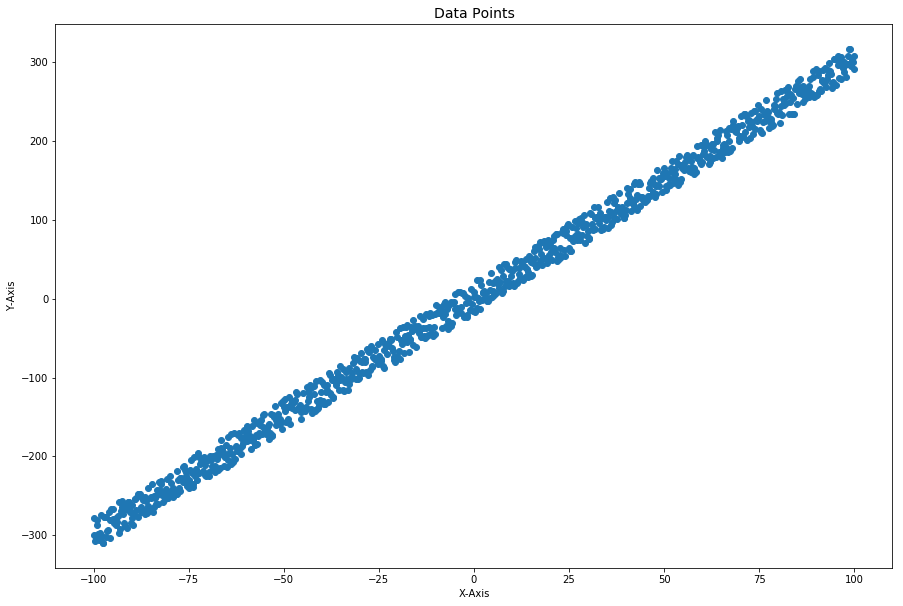

In [0]:
# Add some noise to y values, so we don't get a perfect fit of the line
offset=20

Add some offset of randomly generated numbers
noise=np.random.uniform(-1,1,size=y.shape)*offset

# Adding noise to Y
y = y + noise

# Draw (x,y) points
plt.figure(figsize=(15,10))
plt.title('Data Points',fontsize=14)
plt.xlabel('X-Axis')
plt.ylabel('Y-Axis')

# Plot points (x,y) pairs

plt.scatter(x,y)
plt.show()


Using sklearn library, we will divide our data input train and test sets.

In [0]:
from sklearn.model_selection import train_test_split                            # Importing from sklearn, to split dataset into train and test split

# Given x and y list values, this function will split the data into train and test data by randomly selecting points for each (train and test)
train_x,test_x,train_y,test_y=train_test_split(x,y)


## Estimating Parameters:
Equation of a line is given by: ```y = mx + c``` where m and c are parameters. We need to estimate those parameters. For that, we will use three methods and will compare their results.

### Ordinary Least Squares Method
The OLS method is given by algorithm:

![OLS.png](attachment:OLS.png)

In [0]:
# Following lines implement the algorithm mentioned in the image above.

# Calculate mean values for x array and y array values
xmean=np.mean(x)
ymean=np.mean(y)

SP_xy=np.sum((x-xmean)*(y-ymean))
SP_xx=np.sum((x-xmean)**2)
OLS_c_1=SP_xy/SP_xx
OLS_c_0=ymean-OLS_c_1*(xmean)

print('Calculated parameter values using OLS method are: %.3f %.3f'%(OLS_c_0,OLS_c_1))

Calculated parameter values using OLS method are: 1.545 3.006


## Normal Equation
Now we will use normal equation method to estimate our parameters.
![normalequation.png](attachment:normalequation.png)

Here, we will create a matrix of X by appending 1s column with our original vector x. Then, we will use this equation to directly calculate our parameters.

In [0]:
# Initializing an array of shape as x array, filled with ones 
ones=np.ones(shape=x.shape)

X=np.concatenate((ones,x),axis=1)                                               # Appending ones as column with x
Y=y
[Normal_c_0,Normal_c_1]=np.dot(np.dot(np.linalg.pinv(np.dot(X.T,X)),X.T),Y)     # Equation to get coefficients
print('Calculated parameter values using Normal equation are: %.3f %.3f'%(Normal_c_0,Normal_c_1))


Calculated parameter values using Normal equation are: 1.545 3.006


## Using Gradient Descent
We will use gradient descent method to estimate our parameters. The method of gradient descent has been explained well in theoretical part. So steps to perform a single iteration of weight updates is as follows:
1. We start by initializing our parameter values. Here we have initialized them randomly.
2. Convert x, y and weights to matrices (numpy arrays)
3. Compute cost
4. Compute derivative of the cost
5. Update parameters by a factor of derivative, (factor means the amount of updates to be made in each iteration and is defined by learning rate)
6. Repeat Point 2 - Point 6 for N number of epochs

In [0]:
# Initializing parameters randomly
[c_0,c_1]=np.random.rand(2)

### Compute Derivatives
Derivatives with respect to each parameter will be calculated and the equations to find them are given by:
![derivatives.png](attachment:derivatives.png)

In [0]:
# This function computes derivative of cost with respect to a parameter (c_0 or c_1) where 
# idx is the index of parameter to which we need to find the derivative with respect to.

def compute_derivative(c_0,c_1,X,Y,m,idx):
  # Compute y values with the parameters of model (c_0 and c_1):
  y_pred=np.reshape(c_0*X[:,0]+c_1*X[:,1],(m,1))
  
  # Computer derivative of loss function with respect to each parameter (we have already covered this in theoretical part)
  deriv=np.sum(np.multiply((y_pred-Y),np.reshape(X[:,idx],(m,1))))
  
  deriv=(deriv*2)/m
  return deriv


### Compute Cost
To calculate the cost, we predict y values $p^(i)$ using new parameters and use actual y values:
![mseloss.png](attachment:mseloss.png)

In [0]:
# This function computes cost/loss of a set of parameters
def compute_cost(c_0,c_1,X,Y,m):
  # Compute y values with parameters of model (c_0 and c_1)
  y_pred=np.reshape(c_0*X[:,0]+c_1*X[:,1],(m,1))
  
  # Compute cost with formula we covered earlier
  out=np.square(y_pred-Y)
  return (np.sum(out)*2)/m


In [0]:
import math
from sklearn.metrics import r2_score                       # We will use r2_score to define the accuracy of regression model

lr=1e-7                                                    # learning rate
m=train_y.shape[0]                                         # m = Total number of points for training
epochs=20000                                               # Train the model for 20000 epochs


Y=train_y
X=np.concatenate((np.ones_like(train_x),train_x),axis=1)   # Create X array by appending 1s with original x values

losses=[]
train_acc=[]
test_acc=[]
for i in range(1,epochs):                                  # Train for epochs
    loss=compute_cost(c_0,c_1,X,Y,m)                       # Compute cost with new paramters.
    if(math.isnan(loss) or math.isinf(loss)):              # If loss is not a number or is infinity, break the loop
        print('breaking at iteration:',i)
        break
    losses.append(loss)
    deriv_0=compute_derivative(c_0,c_1,X,Y,m,0)            # Compute derivative of the cost with respect of first parameter
    deriv_1=compute_derivative(c_0,c_1,X,Y,m,1)            # Compute derivative of the cost with respect of second parameter
    c_0=c_0-lr*deriv_0                                     # Update parameters by a factor of derivative
    c_1=c_1-lr*deriv_1

    _,r2score=evaluate(train_x,train_y,c_0,c_1)            # evaluate training model on train data
    train_acc.append(r2score)
    _,r2score=evaluate(test_x,test_y,c_0,c_1)              # evaluate training model on test data
    test_acc.append(r2score)
GD_c_0=c_0
GD_c_1=c_1
print('Calculated parameter values using Gradient Descent are: %.3f %.3f'%(GD_c_0,GD_c_1))


NameError: ignored

## Visualizations of Loss and Accuracy Metrics
We will visualize the loss values and accuracy metrics with respect to epochs to see how the model improved with time.

In [0]:
# Define a figure for loss visualization
plt.figure('Loss')
plt.title('Gradient Descent',fontsize=10)
plt.autoscale(enable=True, axis='y')
plt.plot(np.array(range(len(losses))),losses,'-',color='green',label='loss')
plt.legend(loc='upper right')
plt.xlabel('Epochs',fontsize=8)
plt.ylabel('Loss',fontsize=8)
plt.show()

#we can also visualize that model has not just overfit the training data but is also performing well on test data
plt.figure('Accuracy Metrics')
plt.title('Train and Test R2 scores in Gradient Descent',fontsize=10)
plt.autoscale(enable=True, axis='y')
plt.plot(np.array(range(len(train_acc))),train_acc,'-',color='green',label='Training Evaluation')
plt.plot(np.array(range(len(test_acc))),test_acc,'-',color='red',label='Test Evaluation')
plt.legend(loc='upper left')
plt.xlabel('Epochs',fontsize=8)
plt.ylabel('r2_score',fontsize=8)
plt.show()


## Evaluation
We need to evaluate three models (OLS, Normal Equation and Gradient Descent) to see which one performed the best. We can use Mean Squared Error metrics, Mean Absolute Error, Root Mean Squared Error or R squared.

We will use R2_score to evaluate our models. An r2 score can range from -1 to 1 with the best value being 1 and a model performing worst will give an r2 score of -1. R2 score compares the model with a horizontal line that passes throught the data. This means that a model which always predicts a constant value irrespective of the input value will have an R2 score of 0.0

In [0]:
# Following function will evalute the parameters estimated by a model
def evaluate(test_x,test_y,c0__,c1__):
  # Get y values based on model parameters
  pred_y=c0__+c1__*test_x
  
  # Calculate r2_score
  r2score=r2_score(test_y,pred_y)
  
  # calculate adjusted r2_score
  adjusted_r_squared = 1 - (1-r2score)*(len(test_y)-1)/(len(test_y)-X.shape[1]-1)
  return pred_y,adjusted_r_squared

In [0]:
# These x and y limits are just to define the viewing area in 2D coordinates
xminlim=-50
xmaxlim=50
yminlim=-200
ymaxlim=200

# Define three subplots
fig, ax = plt.subplots(1, 3)

# Set x and y limits for all three subplots
for i in range(3):
    ax[i].set_xlim([xminlim,xmaxlim])
    ax[i].set_ylim([yminlim,ymaxlim])

# Set figure size (in inches)
fig.set_size_inches(10.25, 5.25)

fig.suptitle('Linear Regression',fontsize=12)

# Plot (x,y) data points on all three subplots
ax[0].scatter(x,y,c='r',marker='.')
ax[1].scatter(x,y,c='r',marker='.')
ax[2].scatter(x,y,c='r',marker='.')

print('\nMethod: Ordinary Least Squares')
# Calculate R2 score for Ordinary Least Squares method for test and train 
_,r2score=evaluate(train_x,train_y,OLS_c_0,OLS_c_1)

print('Training R2_score: ',r2score)
pred_ols,r2score=evaluate(test_x,test_y,OLS_c_0,OLS_c_1)
print('Test R2_score: ',r2score)

ax[0].set_title('Method: Ordinary Least Squares')
p=ax[0].plot(test_x,pred_ols,'-',c='black',label='Method 1')
ax[0].set_xlabel('X Values')
ax[0].set_ylabel('Y Values')

print('\nMethod: Normal Equation')
# Calculate R2 score for Normal Equation method for test and train 
_,r2score=evaluate(train_x,train_y,Normal_c_0,Normal_c_1)
print('Training R2_score: ',r2score)
pred_normal,r2score=evaluate(test_x,test_y,Normal_c_0,Normal_c_1)
print('Test R2_score: ',r2score)

ax[1].set_title('Method: Normal Equation')
ax[1].plot(test_x,pred_normal,'-',c='blue')
ax[1].set_xlabel('X Values')
ax[1].set_ylabel('Y Values')


print('\nMethod: Gradient Descent')
# Calculate R2 score for Gradient Descent method for test and train 
_,r2score=evaluate(train_x,train_y,GD_c_0,GD_c_1)
print('Training R2_score: ',r2score)
pred_gd,r2score=evaluate(test_x,test_y,GD_c_0,GD_c_1)
print('Test R2_score: ',r2score)

ax[2].set_title('Method: Gradient Descent')
ax[2].plot(test_x,pred_gd,'-',c='green')
ax[2].set_xlabel('X Values')
ax[2].set_ylabel('Y Values')

plt.show()



As we can see, all three models performed equally well on dataset.